In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge


In [ ]:
df = pd.read_csv("neic_earthquakes3.csv")

In [ ]:
df = df.dropna()
y = df['mag']
X = df.drop(['mag', 'time', 'magType', 'updated', 'place','id', 'type', 'status', 'locationSource', 'magSource', 'net'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

train_offset = np.ones((X_train.shape[0], 1))
X_train = np.concatenate((train_offset, X_train), axis=1)
test_offset = np.ones((X_test.shape[0], 1))
X_test = np.concatenate((test_offset, X_test), axis=1)



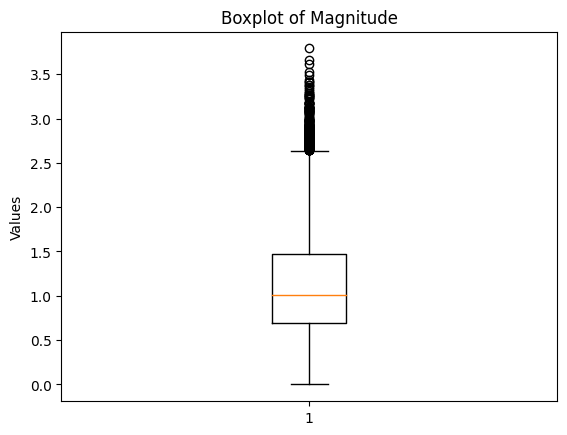

In [ ]:
plt.figure()
plt.boxplot(df['mag'])
plt.title('Boxplot of Magnitude')
plt.ylabel('Values')
plt.show()

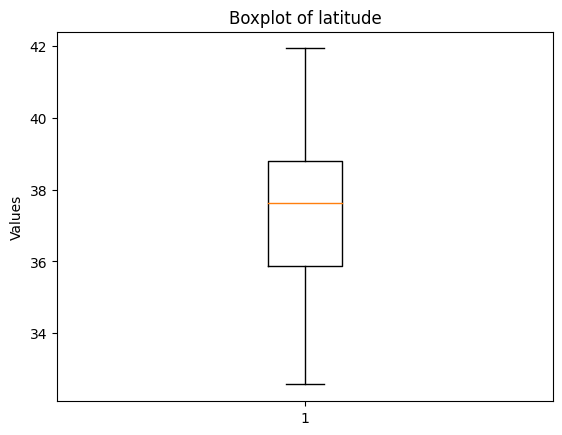

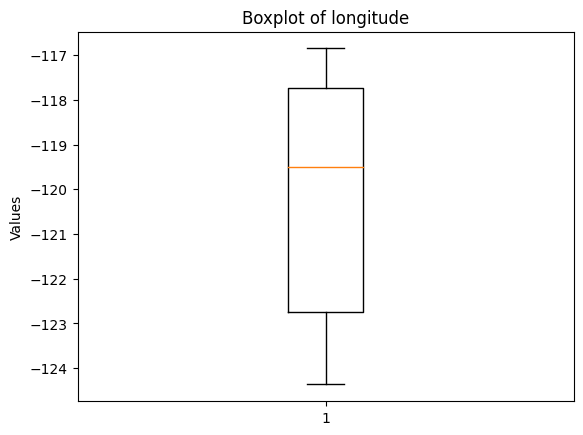

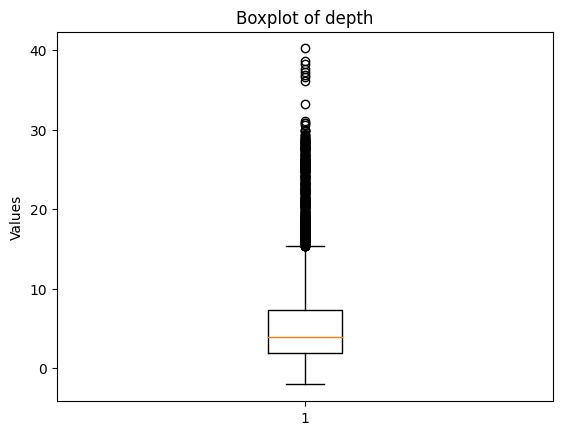

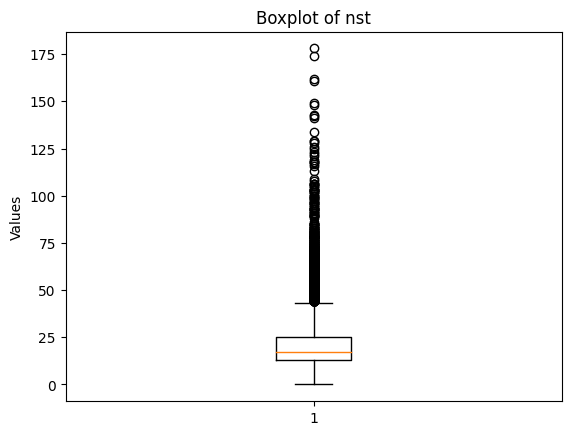

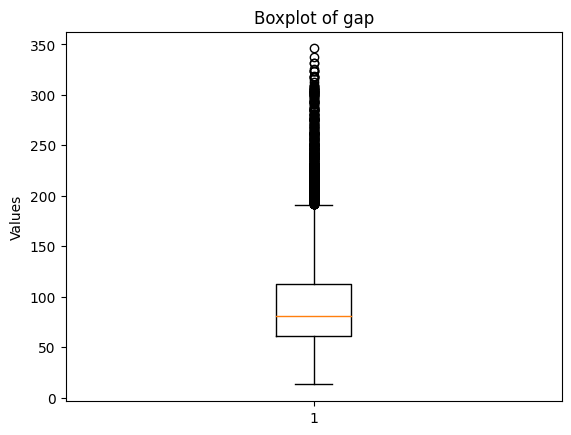

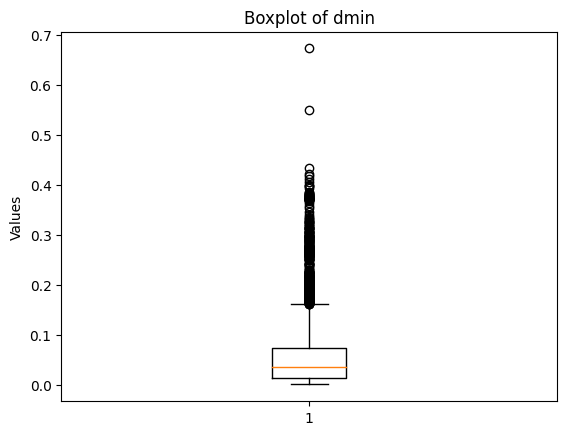

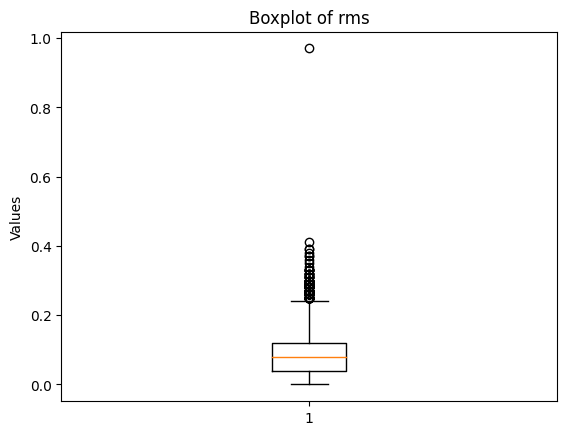

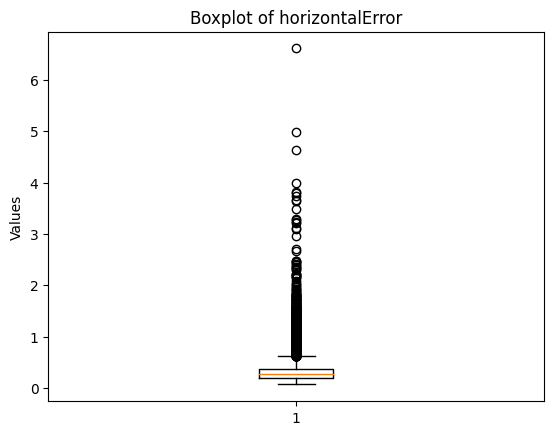

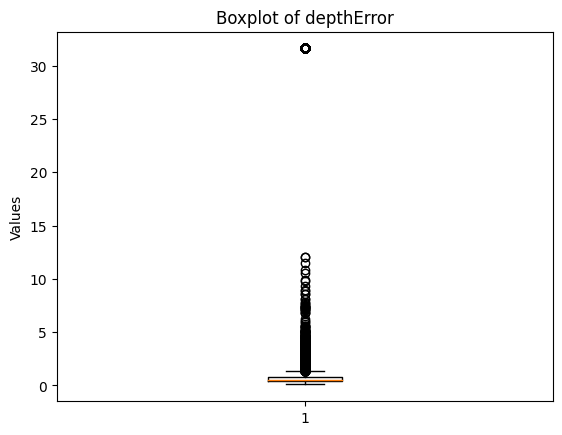

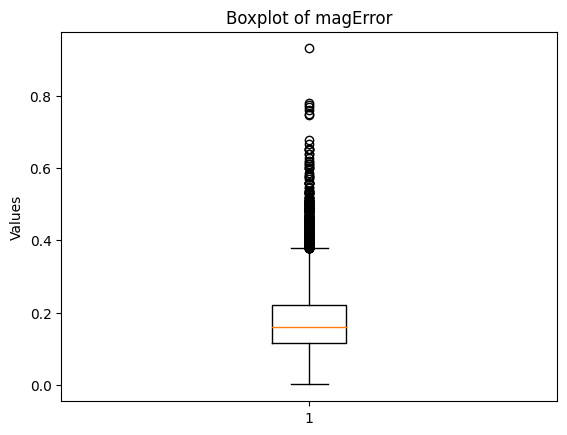

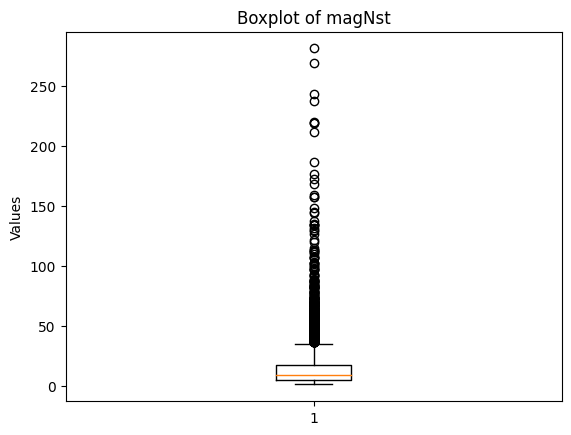

In [ ]:
for col in X.columns:
    plt.figure()
    plt.boxplot(df[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel('Values')
    plt.show()

In [ ]:
def runmodel(model, x_train, y_train, x_test, y_test):
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  train_pred = model.predict(x_train)

  mse_test = mean_squared_error(y_test, y_pred)
  mse_train = mean_squared_error(y_train, train_pred)
  return model, mse_train, mse_test, y_pred, y_test, y_train, train_pred

In [ ]:
model = LinearRegression(fit_intercept=False)
model_res, mse_train, mse_test, y_pred, y_test, y_train, train_pred = runmodel(model, X_train, y_train, X_test, y_test)
print(f'R_squared: {r2_score(y_test, y_pred)}')
print(f'Mean squared error train: {mse_train}')
print(f'Mean squared error test: {mse_test}')


R_squared: 0.6084454277480078
Mean squared error train: 0.13298896794628123
Mean squared error test: 0.1418758800117725


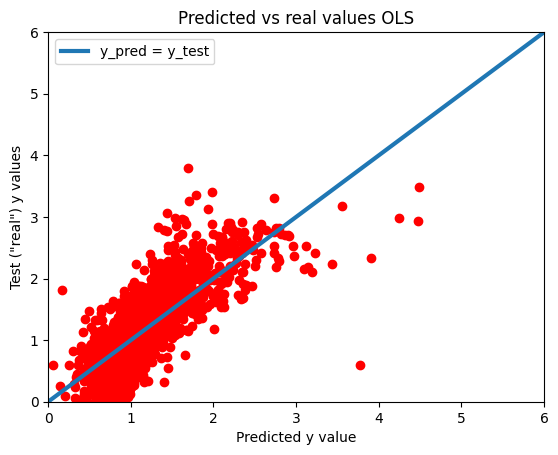

In [ ]:
xs = np.linspace(0, 6, 400)
ys = np.linspace(0, 6, 400)
fig, ax = plt.subplots()
ax.scatter(y_pred, y_test, color='red')
ax.plot(xs, ys, label='y_pred = y_test', lw=3)
ax.set_xlabel('Predicted y value')
ax.set_ylabel('Test ("real") y values')
plt.title("Predicted vs real values OLS")
ax.set_xlim(0, 6)
ax.set_ylim(0, 6)
ax.legend()

                 latitude  longitude     depth       nst       gap      dmin  \
latitude         1.000000  -0.809439 -0.253172 -0.219902 -0.011059 -0.253172   
longitude       -0.809439   1.000000  0.210277 -0.005592  0.099365  0.322305   
depth           -0.253172   0.210277  1.000000  0.167836  0.088695  0.303728   
nst             -0.219902  -0.005592  0.167836  1.000000 -0.429977  0.041019   
gap             -0.011059   0.099365  0.088695 -0.429977  1.000000  0.196375   
dmin            -0.253172   0.322305  0.303728  0.041019  0.196375  1.000000   
rms             -0.651132   0.578385  0.334486  0.295012 -0.041202  0.413054   
horizontalError  0.067371   0.006476  0.069879 -0.341681  0.641274  0.124203   
depthError      -0.179495   0.119846 -0.189740 -0.031646  0.061035  0.150559   
magError         0.147780  -0.113040 -0.033158 -0.091964 -0.018020 -0.052348   
magNst          -0.149864   0.120508  0.213090  0.647406 -0.204924  0.206506   

                      rms  horizontalEr

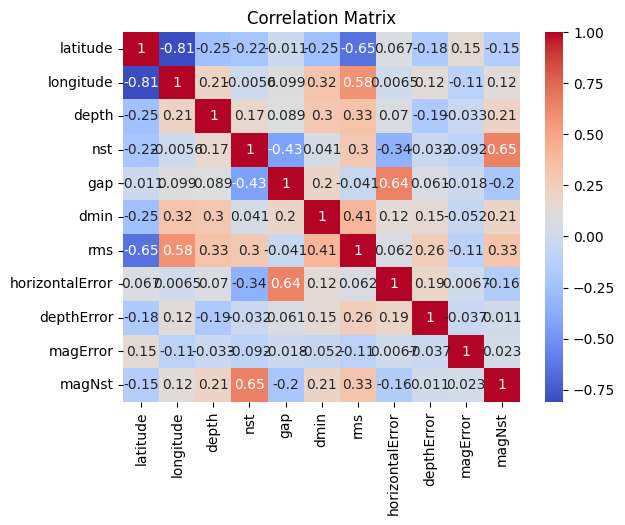

In [ ]:
corr_matrix = X.corr()
print(corr_matrix)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_features = PolynomialFeatures(degree=3)
x_train_poly = polynomial_features.fit_transform(X_train)
x_test_poly = polynomial_features.fit_transform(X_test)

model_poly = LinearRegression(fit_intercept=False)
model_res, mse_train, mse_test, y_pred, y_test, y_train, train_pred = runmodel(model_poly, x_train_poly, y_train, x_test_poly, y_test)
print(f'Mean squared error train: {mse_train}')
print(f'Mean squared error test: {mse_test}')



Mean squared error train: 0.06278398515027736
Mean squared error test: 0.2501363992071466


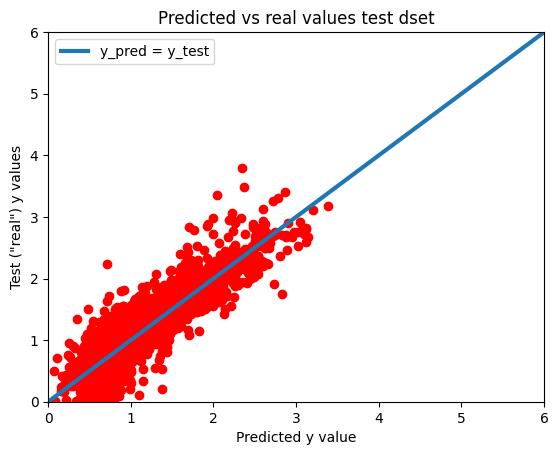

In [ ]:
xs = np.linspace(0, 6, 400)
ys = np.linspace(0, 6, 400)
fig, ax = plt.subplots()
ax.scatter(y_pred, y_test, color='red')
ax.plot(xs, ys, label='y_pred = y_test', lw=3)
ax.set_xlabel('Predicted y value')
ax.set_ylabel('Test ("real") y values')
plt.title("Predicted vs real values test dset")
ax.set_xlim(0, 6)
ax.set_ylim(0, 6)
ax.legend()

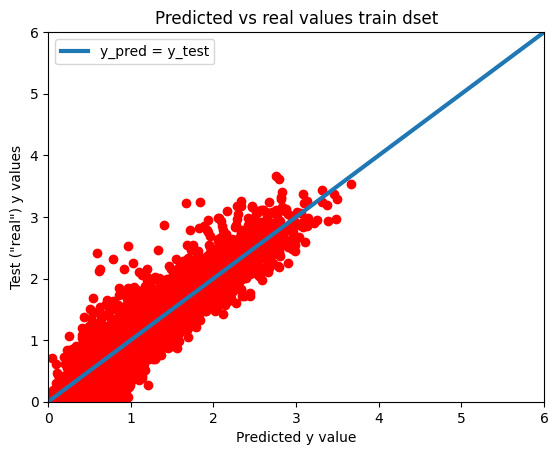

In [ ]:
xs = np.linspace(0, 6, 400)
ys = np.linspace(0, 6, 400)
fig, ax = plt.subplots()
ax.scatter(train_pred, y_train, color='red')
ax.plot(xs, ys, label='y_pred = y_test', lw=3)
ax.set_xlabel('Predicted y value')
ax.set_ylabel('Test ("real") y values')
plt.title("Predicted vs real values train dset")
ax.set_xlim(0, 6)
ax.set_ylim(0, 6)
ax.legend()

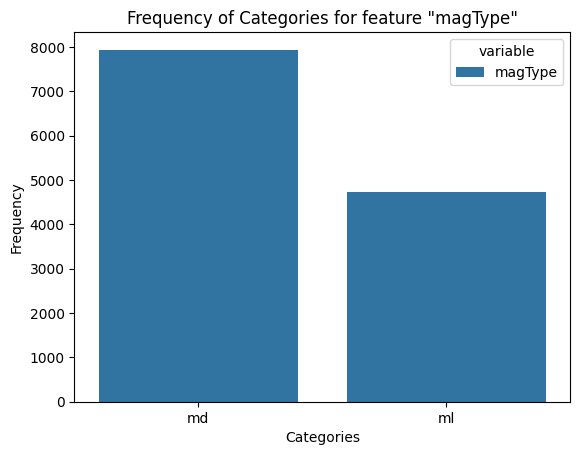

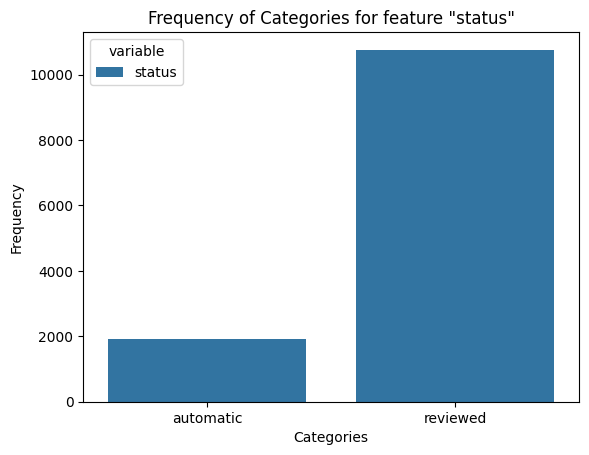

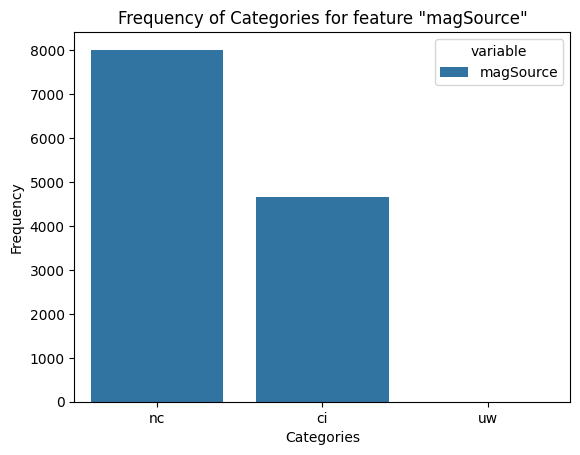

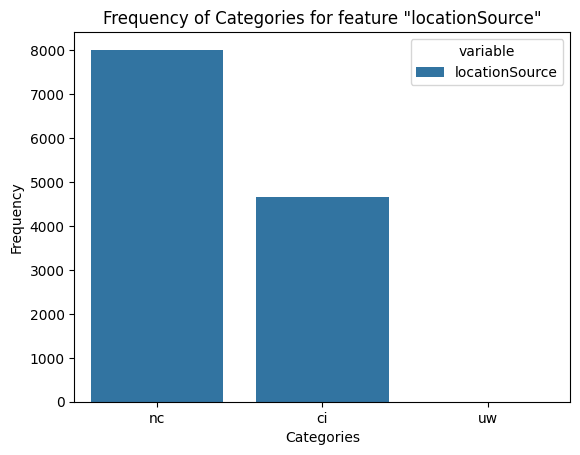

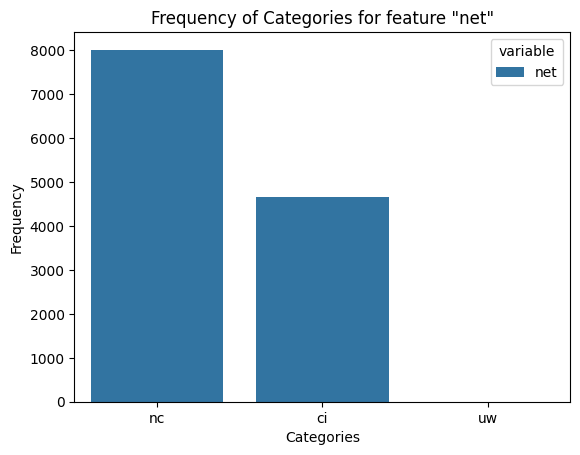

In [ ]:
cat = ['magType','status','magSource','locationSource', 'net']

for c in cat:
  long_df = df.melt(value_vars=[c])

  sns.countplot(data=long_df, x='value', hue='variable')
  plt.title(f'Frequency of Categories for feature "{c}"')
  plt.xlabel('Categories')
  plt.ylabel('Frequency')
  plt.show()


In [ ]:
df = df.dropna()
y = df['mag']
X = df.drop(['mag', 'time', 'updated', 'place','id', 'type'], axis=1)
#dummies magtype, status, magsource, location source, net
X = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [ ]:
model = LinearRegression(fit_intercept=False)
model_res, mse_train, mse_test, y_pred, y_test, y_train, train_pred = runmodel(model, X_train, y_train, X_test, y_test)
print(f'R_squared: {r2_score(y_test, y_pred)}')
print(f'Mean squared error train: {mse_train}')
print(f'Mean squared error test: {mse_test}')

R_squared: 0.6517800412618258
Mean squared error train: 0.1302306888444314
Mean squared error test: 0.12107856098664407


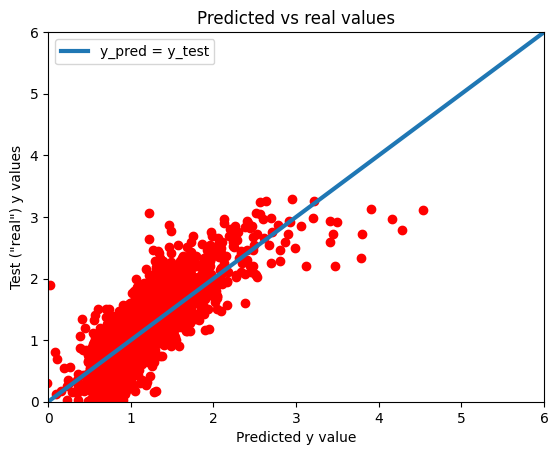

In [ ]:
xs = np.linspace(0, 6, 400)
ys = np.linspace(0, 6, 400)
fig, ax = plt.subplots()
ax.scatter(y_pred, y_test, color='red')
ax.plot(xs, ys, label='y_pred = y_test', lw=3)
ax.set_xlabel('Predicted y value')
ax.set_ylabel('Test ("real") y values')
plt.title("Predicted vs real values")
ax.set_xlim(0, 6)
ax.set_ylim(0, 6)
ax.legend()

Good polynomial

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_features = PolynomialFeatures(degree=3)
x_train_poly = polynomial_features.fit_transform(X_train)
x_test_poly = polynomial_features.fit_transform(X_test)

model_poly = LinearRegression(fit_intercept=False)
model_res, mse_train, mse_test, y_pred, y_test, y_train, train_pred  = runmodel(model_poly, x_train_poly, y_train, x_test_poly, y_test)
print(f'Mean squared error train: {mse_train}')
print(f'Mean squared error test: {mse_test}')

Mean squared error train: 0.04695731916558418
Mean squared error test: 10.136211009912628


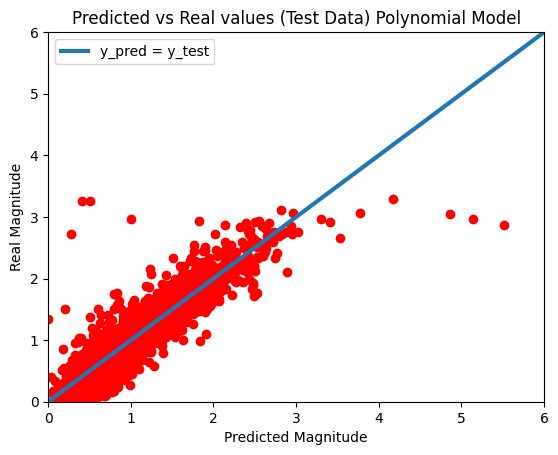

In [ ]:
xs = np.linspace(0, 6, 400)
ys = np.linspace(0, 6, 400)
fig, ax = plt.subplots()
ax.scatter(y_pred, y_test, color='red')
ax.plot(xs, ys, label='y_pred = y_test', lw=3)
ax.set_xlabel('Predicted Magnitude')
ax.set_ylabel('Real Magnitude')
plt.title("Predicted vs Real values (Test Data) Polynomial Model")
ax.set_xlim(0, 6)
ax.set_ylim(0, 6)
ax.legend()

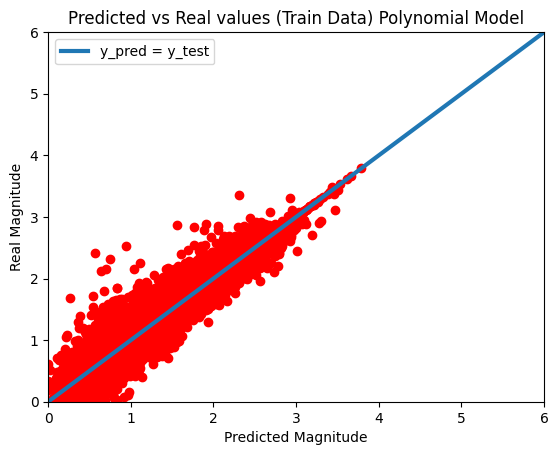

In [ ]:
xs = np.linspace(0, 6, 400)
ys = np.linspace(0, 6, 400)
fig, ax = plt.subplots()
ax.scatter(train_pred, y_train, color='red')
ax.plot(xs, ys, label='y_pred = y_test', lw=3)
ax.set_xlabel('Predicted Magnitude')
ax.set_ylabel('Real Magnitude')
plt.title("Predicted vs Real values (Train Data) Polynomial Model")
ax.set_xlim(0, 6)
ax.set_ylim(0, 6)
ax.legend()

Ridge regression